In [1]:
import sys
import os
import numpy as np                                # numpy is a collection of python modules for array math.
from matplotlib import pyplot as plt              # A collection of modules. Needed here to display images and graphs.
from matplotlib import pylab                      # A collection of modules. Needed here to plot histograms.
sys.path.append('/Users/benkoch/Desktop/UChicago/2nd year/Spring/ASTR 21200/a212pylibs') # Adds the path to the DataPype module to the system path.
from datapype.datafits import DataFits            # Gets the function that makes datapype io objects from module datafits in package datapype.
from astropy.io import fits                       # Need this if you want to use astropy.io io objects.
from ipywidgets import interact                   # Need this for interactive plots.
from matplotlib.colors import LogNorm             # Machinery for LogNorm scaling of intensities.
from matplotlib.colors import SymLogNorm          # Machinery for SymLogNorm scaling of intensities.
from matplotlib.colors import PowerNorm           # Machinery for LogNorm (e.g., square root) scaling of intensities.
from astropy.stats import mad_std                 # The median absolute deviation, a more robust estimator than std.
import scipy.ndimage as nd                        # Various algorithms for image transformations.


# ## Use this if dah_functions is a subdirectory of a212pylibs.
# from dah_functions.dah_functions import head
# from dah_functions.dah_functions import displaypic
# from dah_functions.dah_functions import displaypic2
# from dah_functions.dah_functions import show_image
# from dah_functions.dah_functions import blink_images
# from dah_functions.dah_functions import blink2images
# from dah_functions.dah_functions import rowplot
# from dah_functions.dah_functions import colplot
# from dah_functions.dah_functions import rowcolplot

## Use this if dah_functions is stored in a different path from a212pylibs.
## The following adds a bunch of functions in a module stored in the path below.
sys.path.append('/Users/benkoch/Desktop/UChicago/2nd year/Spring/ASTR 21200/a212pylibs/dah_functions') # Adds path to MyCode directory on my computer to system python path.
from dah_functions_2 import head
from dah_functions_2 import displaypic
from dah_functions_2 import displaypic2
from dah_functions_2 import show_image
from dah_functions_2 import blink_images
from dah_functions_2 import rowplot
from dah_functions_2 import colplot
from dah_functions_2 import rowcolplot
from dah_functions_2 import moments
from dah_functions_2 import quickpic
from dah_functions_2 import getpatch
from dah_functions_2 import stackfits

###############################################################################
# ## Don't need the following in this notebook. Hold on to them for now.
# import time        
# import re
# import scipy.stats
# import matplotlib.colors as colors
# import configobj  #What is this? Where does it come from?
###############################################################################

In [2]:
len(get_ipython().user_ns.keys())

48

In [17]:
datapath = '/Users/benkoch/Desktop/UChicago/2nd year/Spring/ASTR 21200/24inch_data/190504/dark'

In [18]:
whichpath = datapath

## For ALL the files in the directory.
allfiles = [f for f in os.listdir(datapath)]

allfiles = sorted(allfiles)       ## This is necessary on my Mac, may not be for others?
for i in range(len(allfiles)):
    print( i, allfiles[i])

0 .DS_Store
1 dark_190504_AB-001_020s.fit
2 dark_190504_AB-001_040s.fit
3 dark_190504_AB-001_100s.fit
4 dark_190504_AB-001_180s.fit
5 dark_190504_AB-001_bias.fit
6 dark_190504_AB-002_020s.fit
7 dark_190504_AB-002_040s.fit
8 dark_190504_AB-002_100s.fit
9 dark_190504_AB-002_180s.fit
10 dark_190504_AB-002_bias.fit
11 dark_190504_AB-003_020s.fit
12 dark_190504_AB-003_040s.fit
13 dark_190504_AB-003_100s.fit
14 dark_190504_AB-003_180s.fit
15 dark_190504_AB-003_bias.fit
16 dark_190504_AB-004_020s.fit
17 dark_190504_AB-004_040s.fit
18 dark_190504_AB-004_100s.fit
19 dark_190504_AB-004_180s.fit
20 dark_190504_AB-004_bias.fit
21 dark_190504_AB-005_020s.fit
22 dark_190504_AB-005_040s.fit
23 dark_190504_AB-005_100s.fit
24 dark_190504_AB-005_180s.fit
25 dark_190504_AB-005_bias.fit
26 dark_190504_AB-006_020s.fit
27 dark_190504_AB-006_040s.fit
28 dark_190504_AB-006_100s.fit
29 dark_190504_AB-006_180s.fit
30 dark_190504_AB-006_bias.fit
31 dark_190504_AB-007_020s.fit
32 dark_190504_AB-007_040s.fit
33 da

854 dark_190504_AD-097_100s.fit
855 dark_190504_AD-097_180s.fit
856 dark_190504_AD-098_180s.fit
857 dark_190504_AD-098_bias.fit
858 dark_190504_AD-099_020s.fit
859 dark_190504_AD-099_040s.fit
860 dark_190504_AD-099_100s.fit
861 dark_190504_AD-099_180s.fit
862 dark_190504_AD-099_bias.fit
863 dark_190504_AD-100_020s.fit
864 dark_190504_AD-100_040s.fit
865 dark_190504_AD-100_100s.fit
866 dark_190504_AD-100_180s.fit
867 dark_190504_AD-100_bias.fit
868 dark_190504_AD-101_020s.fit
869 dark_190504_AD-101_040s.fit
870 dark_190504_AD-101_100s.fit
871 dark_190504_AD-101_180s.fit
872 dark_190504_AD-101_bias.fit
873 dark_190504_AD-102_020s.fit
874 dark_190504_AD-102_040s.fit
875 dark_190504_AD-102_100s.fit
876 dark_190504_AD-102_180s.fit
877 dark_190504_AD-102_bias.fit
878 dark_190504_AD-103_020s.fit
879 dark_190504_AD-103_040s.fit
880 dark_190504_AD-103_100s.fit
881 dark_190504_AD-103_180s.fit
882 dark_190504_AD-103_bias.fit
883 dark_190504_AD-104_020s.fit
884 dark_190504_AD-104_040s.fit
885 dark

In [30]:
whichpath = datapath

somefiles = [f for f in os.listdir(whichpath) if '.fit' in f and '_bias' in f and 'stack' not in f]

somefiles = sorted(somefiles)       ## This is necessary on my Mac, may not be for others?
for i in range(len(somefiles)):
    print( i, somefiles[i])



0 dark_190504_AB-001_bias.fit
1 dark_190504_AB-002_bias.fit
2 dark_190504_AB-003_bias.fit
3 dark_190504_AB-004_bias.fit
4 dark_190504_AB-005_bias.fit
5 dark_190504_AB-006_bias.fit
6 dark_190504_AB-007_bias.fit
7 dark_190504_AB-008_bias.fit
8 dark_190504_AB-009_bias.fit
9 dark_190504_AB-010_bias.fit
10 dark_190504_AB-011_bias.fit
11 dark_190504_AB-012_bias.fit
12 dark_190504_AB-013_bias.fit
13 dark_190504_AB-014_bias.fit
14 dark_190504_AB-015_bias.fit
15 dark_190504_AB-016_bias.fit
16 dark_190504_AB-017_bias.fit
17 dark_190504_AB-018_bias.fit
18 dark_190504_AB-019_bias.fit
19 dark_190504_AB-020_bias.fit
20 dark_190504_AB-021_bias.fit
21 dark_190504_AB-022_bias.fit
22 dark_190504_AB-023_bias.fit
23 dark_190504_AB-024_bias.fit
24 dark_190504_AB-025_bias.fit
25 dark_190504_AB-026_bias.fit
26 dark_190504_AB-027_bias.fit
27 dark_190504_AB-028_bias.fit
28 dark_190504_AB-029_bias.fit
29 dark_190504_AB-030_bias.fit
30 dark_190504_AB-031_bias.fit
31 dark_190504_AB-032_bias.fit
32 dark_190504_AB-

In [31]:
acceptlist = True             # True if you want to accept all the files in somefiles.
contiguous = True             # True if you want to accept a contiguous subset of somefiles.
startfile, endfile = 5,9      # The first and last files in a contiquous subset.
flist = [0,3,4,5,6,7,8]        # An explicit list of the files you want to accept.

if acceptlist == True:
    files = somefiles
    for i in range(len(files)):
        print(i, files[i])
else:
    if contiguous == True:
        files = somefiles[startfile:endfile+1]
        for i in range(len(files)):
            print( i, files[i])
    else:
        files = []
        for i in range(len(flist)):
            files.append(somefiles[flist[i]])
        for i in range(len(files)):
            print( i, flist[i], files[i])

0 dark_190504_AB-001_bias.fit
1 dark_190504_AB-002_bias.fit
2 dark_190504_AB-003_bias.fit
3 dark_190504_AB-004_bias.fit
4 dark_190504_AB-005_bias.fit
5 dark_190504_AB-006_bias.fit
6 dark_190504_AB-007_bias.fit
7 dark_190504_AB-008_bias.fit
8 dark_190504_AB-009_bias.fit
9 dark_190504_AB-010_bias.fit
10 dark_190504_AB-011_bias.fit
11 dark_190504_AB-012_bias.fit
12 dark_190504_AB-013_bias.fit
13 dark_190504_AB-014_bias.fit
14 dark_190504_AB-015_bias.fit
15 dark_190504_AB-016_bias.fit
16 dark_190504_AB-017_bias.fit
17 dark_190504_AB-018_bias.fit
18 dark_190504_AB-019_bias.fit
19 dark_190504_AB-020_bias.fit
20 dark_190504_AB-021_bias.fit
21 dark_190504_AB-022_bias.fit
22 dark_190504_AB-023_bias.fit
23 dark_190504_AB-024_bias.fit
24 dark_190504_AB-025_bias.fit
25 dark_190504_AB-026_bias.fit
26 dark_190504_AB-027_bias.fit
27 dark_190504_AB-028_bias.fit
28 dark_190504_AB-029_bias.fit
29 dark_190504_AB-030_bias.fit
30 dark_190504_AB-031_bias.fit
31 dark_190504_AB-032_bias.fit
32 dark_190504_AB-

In [32]:
## Make a stack of images.
image, headlist, rows, cols, imedian, imad = stackfits(datapath,files)

GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration


rows = 1024    cols = 1024
image.shape = (274, 1024, 1024)

0 dark_190504_AB-001_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



1 dark_190504_AB-002_bias.fit

2 dark_190504_AB-003_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



3 dark_190504_AB-004_bias.fit

4 dark_190504_AB-005_bias.fit

5 dark_190504_AB-006_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



6 dark_190504_AB-007_bias.fit

7 dark_190504_AB-008_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



8 dark_190504_AB-009_bias.fit

9 dark_190504_AB-010_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



10 dark_190504_AB-011_bias.fit

11 dark_190504_AB-012_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



12 dark_190504_AB-013_bias.fit

13 dark_190504_AB-014_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



14 dark_190504_AB-015_bias.fit

15 dark_190504_AB-016_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



16 dark_190504_AB-017_bias.fit

17 dark_190504_AB-018_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



18 dark_190504_AB-019_bias.fit

19 dark_190504_AB-020_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



20 dark_190504_AB-021_bias.fit

21 dark_190504_AB-022_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



22 dark_190504_AB-023_bias.fit

23 dark_190504_AB-024_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



24 dark_190504_AB-025_bias.fit

25 dark_190504_AB-026_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



26 dark_190504_AB-027_bias.fit

27 dark_190504_AB-028_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



28 dark_190504_AB-029_bias.fit

29 dark_190504_AB-030_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



30 dark_190504_AB-031_bias.fit

31 dark_190504_AB-032_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



32 dark_190504_AB-033_bias.fit

33 dark_190504_AB-034_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



34 dark_190504_AB-035_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



35 dark_190504_AB-036_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



36 dark_190504_AB-037_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



37 dark_190504_AB-038_bias.fit

38 dark_190504_AB-039_bias.fit

39 dark_190504_AB-040_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



40 dark_190504_AB-041_bias.fit

41 dark_190504_AB-042_bias.fit

42 dark_190504_AB-043_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



43 dark_190504_AB-044_bias.fit

44 dark_190504_AB-045_bias.fit

45 dark_190504_AB-046_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



46 dark_190504_AB-047_bias.fit

47 dark_190504_AB-048_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



48 dark_190504_AB-049_bias.fit

49 dark_190504_AB-050_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



50 dark_190504_AC-001_bias.fit

51 dark_190504_AC-002_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



52 dark_190504_AC-003_bias.fit

53 dark_190504_AC-004_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



54 dark_190504_AC-005_bias.fit

55 dark_190504_AC-006_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



56 dark_190504_AC-007_bias.fit

57 dark_190504_AC-008_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



58 dark_190504_AC-009_bias.fit

59 dark_190504_AC-010_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



60 dark_190504_AC-011_bias.fit

61 dark_190504_AC-012_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



62 dark_190504_AC-013_bias.fit

63 dark_190504_AC-014_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



64 dark_190504_AC-015_bias.fit

65 dark_190504_AC-016_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



66 dark_190504_AC-017_bias.fit

67 dark_190504_AC-018_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



68 dark_190504_AC-019_bias.fit

69 dark_190504_AC-020_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



70 dark_190504_AC-021_bias.fit

71 dark_190504_AC-022_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



72 dark_190504_AC-023_bias.fit

73 dark_190504_AC-024_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



74 dark_190504_AC-025_bias.fit

75 dark_190504_AD-001_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



76 dark_190504_AD-002_bias.fit

77 dark_190504_AD-003_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



78 dark_190504_AD-004_bias.fit

79 dark_190504_AD-005_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



80 dark_190504_AD-006_bias.fit

81 dark_190504_AD-007_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



82 dark_190504_AD-008_bias.fit

83 dark_190504_AD-009_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



84 dark_190504_AD-010_bias.fit

85 dark_190504_AD-011_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



86 dark_190504_AD-012_bias.fit

87 dark_190504_AD-013_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



88 dark_190504_AD-014_bias.fit

89 dark_190504_AD-015_bias.fit

90 dark_190504_AD-016_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



91 dark_190504_AD-017_bias.fit

92 dark_190504_AD-018_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



93 dark_190504_AD-019_bias.fit

94 dark_190504_AD-020_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



95 dark_190504_AD-021_bias.fit

96 dark_190504_AD-022_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



97 dark_190504_AD-023_bias.fit

98 dark_190504_AD-024_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



99 dark_190504_AD-025_bias.fit

100 dark_190504_AD-026_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



101 dark_190504_AD-027_bias.fit

102 dark_190504_AD-028_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



103 dark_190504_AD-029_bias.fit

104 dark_190504_AD-030_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



105 dark_190504_AD-031_bias.fit

106 dark_190504_AD-032_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



107 dark_190504_AD-033_bias.fit

108 dark_190504_AD-034_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



109 dark_190504_AD-035_bias.fit

110 dark_190504_AD-036_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



111 dark_190504_AD-037_bias.fit

112 dark_190504_AD-038_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



113 dark_190504_AD-039_bias.fit

114 dark_190504_AD-040_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



115 dark_190504_AD-041_bias.fit

116 dark_190504_AD-042_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



117 dark_190504_AD-043_bias.fit

118 dark_190504_AD-044_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



119 dark_190504_AD-045_bias.fit

120 dark_190504_AD-046_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



121 dark_190504_AD-047_bias.fit

122 dark_190504_AD-048_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



123 dark_190504_AD-049_bias.fit

124 dark_190504_AD-050_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



125 dark_190504_AD-051_bias.fit

126 dark_190504_AD-052_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



127 dark_190504_AD-053_bias.fit

128 dark_190504_AD-054_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



129 dark_190504_AD-055_bias.fit

130 dark_190504_AD-056_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



131 dark_190504_AD-057_bias.fit

132 dark_190504_AD-058_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



133 dark_190504_AD-059_bias.fit

134 dark_190504_AD-060_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



135 dark_190504_AD-061_bias.fit

136 dark_190504_AD-062_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



137 dark_190504_AD-063_bias.fit

138 dark_190504_AD-064_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



139 dark_190504_AD-065_bias.fit

140 dark_190504_AD-066_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



141 dark_190504_AD-067_bias.fit

142 dark_190504_AD-068_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



143 dark_190504_AD-069_bias.fit

144 dark_190504_AD-070_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



145 dark_190504_AD-071_bias.fit

146 dark_190504_AD-072_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



147 dark_190504_AD-073_bias.fit

148 dark_190504_AD-074_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



149 dark_190504_AD-075_bias.fit

150 dark_190504_AD-076_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



151 dark_190504_AD-077_bias.fit

152 dark_190504_AD-078_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



153 dark_190504_AD-079_bias.fit

154 dark_190504_AD-080_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



155 dark_190504_AD-081_bias.fit

156 dark_190504_AD-082_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



157 dark_190504_AD-083_bias.fit

158 dark_190504_AD-084_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



159 dark_190504_AD-085_bias.fit

160 dark_190504_AD-086_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



161 dark_190504_AD-087_bias.fit

162 dark_190504_AD-088_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



163 dark_190504_AD-089_bias.fit

164 dark_190504_AD-090_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



165 dark_190504_AD-091_bias.fit

166 dark_190504_AD-092_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



167 dark_190504_AD-093_bias.fit

168 dark_190504_AD-094_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



169 dark_190504_AD-095_bias.fit

170 dark_190504_AD-096_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



171 dark_190504_AD-098_bias.fit

172 dark_190504_AD-099_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



173 dark_190504_AD-100_bias.fit

174 dark_190504_AD-101_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



175 dark_190504_AD-102_bias.fit

176 dark_190504_AD-103_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



177 dark_190504_AD-104_bias.fit

178 dark_190504_AD-105_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



179 dark_190504_AD-106_bias.fit

180 dark_190504_AD-107_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



181 dark_190504_AD-108_bias.fit

182 dark_190504_AD-109_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



183 dark_190504_AD-110_bias.fit

184 dark_190504_AD-111_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



185 dark_190504_AD-112_bias.fit

186 dark_190504_AD-113_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



187 dark_190504_AD-114_bias.fit

188 dark_190504_AD-115_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



189 dark_190504_AD-116_bias.fit

190 dark_190504_AD-117_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



191 dark_190504_AD-118_bias.fit

192 dark_190504_AD-119_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



193 dark_190504_AD-120_bias.fit

194 dark_190504_AD-121_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



195 dark_190504_AD-122_bias.fit

196 dark_190504_AD-123_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



197 dark_190504_AD-124_bias.fit

198 dark_190504_AD-125_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



199 dark_190504_AD-126_bias.fit

200 dark_190504_AD-127_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



201 dark_190504_AD-128_bias.fit

202 dark_190504_AD-129_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



203 dark_190504_AD-130_bias.fit

204 dark_190504_AD-131_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



205 dark_190504_AD-132_bias.fit

206 dark_190504_AD-133_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



207 dark_190504_AD-134_bias.fit

208 dark_190504_AD-135_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



209 dark_190504_AD-136_bias.fit

210 dark_190504_AD-137_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



211 dark_190504_AD-138_bias.fit

212 dark_190504_AD-139_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



213 dark_190504_AD-140_bias.fit

214 dark_190504_AD-141_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



215 dark_190504_AD-142_bias.fit

216 dark_190504_AD-143_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



217 dark_190504_AD-144_bias.fit

218 dark_190504_AD-145_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



219 dark_190504_AD-146_bias.fit

220 dark_190504_AD-147_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



221 dark_190504_AD-148_bias.fit

222 dark_190504_AD-149_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



223 dark_190504_AD-150_bias.fit

224 dark_190504_AD-151_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



225 dark_190504_AD-152_bias.fit

226 dark_190504_AD-153_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



227 dark_190504_AD-154_bias.fit

228 dark_190504_AD-155_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



229 dark_190504_AD-156_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



230 dark_190504_AD-157_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



231 dark_190504_AD-158_bias.fit

232 dark_190504_AD-159_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



233 dark_190504_AD-160_bias.fit

234 dark_190504_AD-161_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



235 dark_190504_AD-162_bias.fit

236 dark_190504_AD-163_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



237 dark_190504_AD-164_bias.fit

238 dark_190504_AD-165_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



239 dark_190504_AD-166_bias.fit

240 dark_190504_AD-167_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



241 dark_190504_AD-168_bias.fit

242 dark_190504_AD-169_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



243 dark_190504_AD-170_bias.fit

244 dark_190504_AD-171_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



245 dark_190504_AD-172_bias.fit

246 dark_190504_AD-173_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



247 dark_190504_AD-174_bias.fit

248 dark_190504_AD-175_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



249 dark_190504_AD-176_bias.fit

250 dark_190504_AD-177_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



251 dark_190504_AD-178_bias.fit

252 dark_190504_AD-179_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



253 dark_190504_AD-180_bias.fit

254 dark_190504_AD-181_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



255 dark_190504_AD-182_bias.fit

256 dark_190504_AD-183_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



257 dark_190504_AD-184_bias.fit

258 dark_190504_AD-185_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



259 dark_190504_AD-186_bias.fit

260 dark_190504_AD-187_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



261 dark_190504_AD-188_bias.fit

262 dark_190504_AD-189_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



263 dark_190504_AD-190_bias.fit

264 dark_190504_AD-191_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



265 dark_190504_AD-192_bias.fit

266 dark_190504_AD-193_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



267 dark_190504_AD-194_bias.fit

268 dark_190504_AD-195_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



269 dark_190504_AD-196_bias.fit

270 dark_190504_AD-197_bias.fit


GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration
GetHeadVal: Missing Configuration



271 dark_190504_AD-198_bias.fit

272 dark_190504_AD-199_bias.fit

273 dark_190504_AD-200_bias.fit


In [33]:
stackarray = image

In [34]:
stackarray_std = np.std(image, axis=0)

img_global_std = np.median(stackarray_std)

noisy_pixels = stackarray_std > img_global_std*1.3

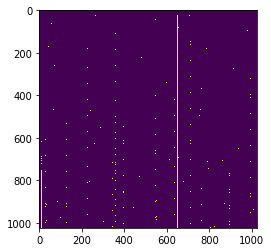

In [35]:
# make a visualization

plt.imshow(noisy_pixels)

In [26]:
## Make a True/False Array

print(noisy_pixels)


[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [29]:
# list the locations

locs = np.array(np.where(noisy_pixels == True))

for i in range(locs.shape[1]):
    print(locs[0,i],locs[1,i])

0 724
0 736
1 415
1 854
1 892
1 898
2 397
2 452
3 282
3 362
3 497
3 872
3 900
4 365
4 366
4 459
5 12
5 151
5 471
6 201
6 259
6 433
6 572
7 62
7 889
8 386
8 387
8 572
8 576
8 638
8 868
8 899
8 912
9 63
9 290
9 392
9 520
9 776
9 885
10 84
10 479
10 520
10 642
10 939
13 47
13 552
13 853
15 230
15 592
15 887
16 59
16 156
16 895
17 112
17 303
17 380
17 549
17 635
17 862
19 146
19 761
20 299
20 546
20 625
21 156
21 366
21 367
21 764
21 910
22 207
22 266
22 628
22 878
23 202
23 388
23 408
23 675
23 956
24 547
24 794
25 97
25 532
25 650
26 212
26 763
27 79
27 120
28 501
28 551
28 794
29 187
29 669
29 820
30 37
30 257
30 485
30 596
31 43
31 647
31 772
31 856
32 729
33 526
33 660
33 915
34 440
34 646
34 800
34 837
35 485
35 799
35 995
36 117
37 336
37 490
37 648
37 885
38 874
38 907
39 74
39 233
39 395
39 433
39 447
39 612
40 724
40 925
41 828
41 865
42 650
42 736
43 225
43 649
43 871
44 664
44 978
45 101
45 650
46 294
46 473
46 633
46 916
47 58
47 75
47 648
48 44
48 247
48 650
48 752
49 357
49 

590 292
590 1017
591 181
591 380
591 613
591 726
592 87
592 762
593 104
593 147
593 345
593 451
593 735
593 829
593 830
594 177
594 615
594 829
594 830
595 906
595 1018
596 117
596 317
597 235
597 811
597 925
598 769
598 807
599 22
599 970
599 1005
600 650
600 1005
601 337
601 691
601 856
601 970
602 98
602 159
602 824
603 781
604 121
604 596
604 726
605 312
605 768
605 987
606 881
606 897
607 87
607 110
607 573
607 621
607 634
608 371
608 479
608 942
609 120
609 366
609 932
609 947
610 953
610 1000
611 220
611 597
611 598
612 70
612 361
612 450
613 413
613 566
613 715
614 434
614 470
614 480
614 1005
615 195
615 650
615 716
616 115
616 472
616 596
616 635
616 807
616 956
617 11
617 115
617 252
617 446
617 680
618 264
618 713
618 865
619 596
619 726
619 794
620 105
620 114
620 596
620 1013
621 69
621 606
621 651
621 905
622 217
622 596
622 713
623 102
623 389
623 596
624 80
624 975
625 586
625 872
625 1008
626 422
626 478
626 822
626 879
626 881
626 993
627 0
627 117
627 146
627 685
62